In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
baseball = pd.read_csv(r"/content/gdrive/My Drive/game_logs.csv")
df = pd.read_csv(r"/content/gdrive/My Drive/game_logs.csv")


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
baseball.columns.values

array(['date', 'number_of_game', 'day_of_week', 'v_name', 'v_league',
       'v_game_number', 'h_name', 'h_league', 'h_game_number', 'v_score',
       'h_score', 'length_outs', 'day_night', 'completion', 'forefeit',
       'protest', 'park_id', 'attendance', 'length_minutes',
       'v_line_score', 'h_line_score', 'v_at_bats', 'v_hits', 'v_doubles',
       'v_triples', 'v_homeruns', 'v_rbi', 'v_sacrifice_hits',
       'v_sacrifice_flies', 'v_hit_by_pitch', 'v_walks',
       'v_intentional walks', 'v_strikeouts', 'v_stolen_bases',
       'v_caught_stealing', 'v_grounded_into_double',
       'v_first_catcher_interference', 'v_left_on_base',
       'v_pitchers_used', 'v_individual_earned_runs',
       'v_team_earned_runs', 'v_wild_pitches', 'v_balks', 'v_putouts',
       'v_assists', 'v_errors', 'v_passed_balls', 'v_double_plays',
       'v_triple_plays', 'h_at_bats', 'h_hits', 'h_doubles', 'h_triples',
       'h_homeruns', 'h_rbi', 'h_sacrifice_hits', 'h_sacrifice_flies',
       'h_hit_b

In [ ]:
# Grab the date and attendance figures from each
decade_average_attend = pd.DataFrame([baseball["date"], baseball["attendance"]]).T
decade_average_attend

,date,attendance
0,18710504.0,200.0
1,18710505.0,5000.0
2,18710506.0,1000.0
3,18710508.0,5000.0
4,18710509.0,3250.0
...,...,...
171902,20161002.0,27762.0
171903,20161002.0,36935.0
171904,20161002.0,41445.0
171905,20161002.0,44615.0


In [ ]:
daa_lengths = []
daa_lengths.append(len(decade_average_attend.index))

decade_average_attend.dropna(inplace = True)
decade_average_attend["decade"] = decade_average_attend.apply( lambda x: int(str(x["date"])[0:3] + "0") ,axis=1)

daa_lengths.append(len(decade_average_attend.index))
print(daa_lengths)

[171907, 118877]


In [ ]:
# Total number of games by decade. There is no game information from the 1970's or the 1990's
decade_average_attend.groupby("decade")["date"].count()

decade
1870      791
1880      163
1890      851
1900      157
1910     5084
1920     4850
1930     5537
1940    11572
1950    12278
1960    15961
1980    20337
2000    24291
2010    17005
Name: date, dtype: int64

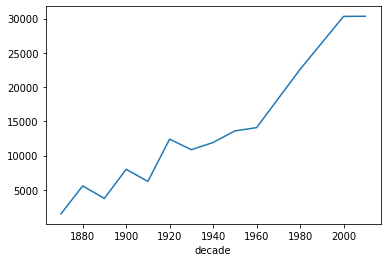

In [ ]:
# Decade vs. Average Attendance of Baseball Games
# Note: 1870's are only 1871-1879 and 2010's are only 2010-2016
decade_average_attend.groupby("decade")["attendance"].mean().plot.line()

= Yearly Homeruns =

In [ ]:
yearly_homeruns = pd.DataFrame([baseball["date"], baseball["v_homeruns"], baseball["h_homeruns"]]).T.dropna()
yearly_homeruns.iloc[0]

date          18710504.0
v_homeruns           0.0
h_homeruns           0.0
Name: 0, dtype: float64

In [ ]:
yearly_homeruns["year"] = yearly_homeruns.apply( lambda x: int(str(x["date"])[0:4]) ,axis=1)
yearly_homeruns["homeruns"] = yearly_homeruns.apply( lambda x: x["v_homeruns"] + x["h_homeruns"] ,axis=1)

yearly_homeruns.iloc[0]

date          18710504.0
v_homeruns           0.0
h_homeruns           0.0
year              1871.0
homeruns             0.0
Name: 0, dtype: float64

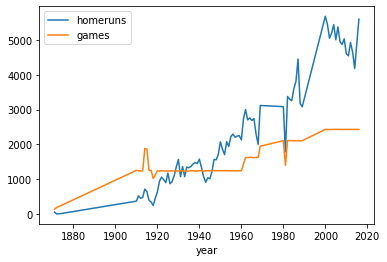

In [ ]:
yhome = pd.DataFrame(yearly_homeruns.groupby("year")["homeruns"].sum())
yhome["games"] = yearly_homeruns.groupby("year")["homeruns"].count()
yhome.plot.line()

= Average Length of a Game During Each Day of the Week =

In [ ]:
length_day = pd.DataFrame([baseball["day_of_week"], baseball["length_minutes"]]).T.dropna()
lenday = length_day.groupby("day_of_week")["length_minutes"].mean()
lenday

day_of_week
Fri    153.228373
Mon    149.222579
Sat    150.857085
Sun    150.890680
Thu    148.057070
Tue    151.884151
Wed    151.196813
Name: length_minutes, dtype: float64

In [ ]:
yearly_hits = pd.DataFrame([baseball["date"], baseball["v_hits"], baseball["h_hits"]]).T.dropna()
yearly_hits.iloc[0]

date      18710504.0
v_hits           4.0
h_hits           4.0
Name: 0, dtype: float64

In [ ]:
yearly_hits["year"] = yearly_hits.apply( lambda x: int(str(x["date"])[0:4]) ,axis=1)
yearly_hits["hits"] = yearly_hits.apply( lambda x: x["v_hits"] + x["h_hits"] ,axis=1)

yearly_hits.iloc[0]

date      18710504.0
v_hits           4.0
h_hits           4.0
year          1871.0
hits             8.0
Name: 0, dtype: float64

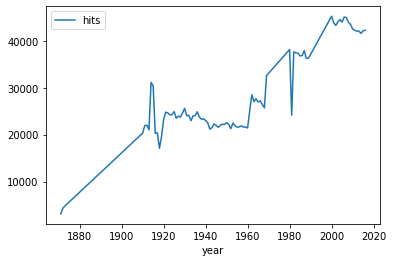

In [ ]:
hits_df = pd.DataFrame(yearly_hits.groupby("year")["hits"].sum())
hits_df.plot.line()

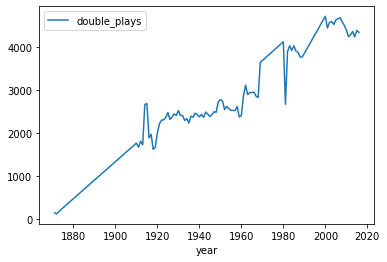

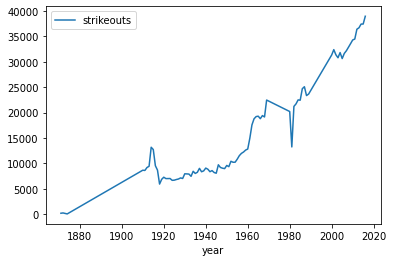

In [ ]:
yearly_double_plays = pd.DataFrame([baseball["date"], baseball["v_double_plays"], baseball["h_double_plays"]]).T.dropna()
yearly_double_plays["year"] = yearly_double_plays.apply( lambda x: int(str(x["date"])[0:4]) ,axis=1)
yearly_double_plays["double_plays"] = yearly_double_plays.apply( lambda x: x["v_double_plays"] + x["h_double_plays"] ,axis=1)
double_plays_df = pd.DataFrame(yearly_double_plays.groupby("year")["double_plays"].sum())
double_plays_df.plot.line()
yearly_strikeouts = pd.DataFrame([baseball["date"], baseball["v_strikeouts"], baseball["h_strikeouts"]]).T.dropna()
yearly_strikeouts["year"] = yearly_strikeouts.apply( lambda x: int(str(x["date"])[0:4]) ,axis=1)
yearly_strikeouts["strikeouts"] = yearly_strikeouts.apply( lambda x: x["v_strikeouts"] + x["h_strikeouts"] ,axis=1)
strikeouts_df = pd.DataFrame(yearly_strikeouts.groupby("year")["strikeouts"].sum())
strikeouts_df.plot.line()

# Steroid Era Comparisons

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
stats = df.set_index('date')
pd.set_option('max_columns', None)

2.204756022235948
1.9300411522633745


<ipython-input-13-71a70cc19bdc>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  steroid = stats['2000':'2003']
<ipython-input-13-71a70cc19bdc>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  regulated = stats['2010':'2013']


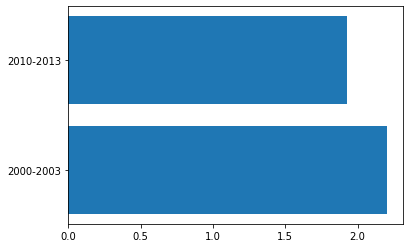

In [ ]:
steroid = stats['2000':'2003']
regulated = stats['2010':'2013']
# All homeruns from the steroid era and the average
HRSteroid = steroid['v_homeruns'] + steroid['h_homeruns']
avgHRS = HRSteroid.mean()
# All homeruns from 10 years later to compare against the steroid era and the average
HRRegulated = regulated['v_homeruns'] + regulated['h_homeruns']
avgHRR = HRRegulated.mean()
# Setup for the bar chart
AVGS = [avgHRS,avgHRR]
YEARS = ['2000-2003','2010-2013']
# Bar Chart Viusualization

print(avgHRS)
print(avgHRR)


plt.barh(YEARS,AVGS)
plt.show()


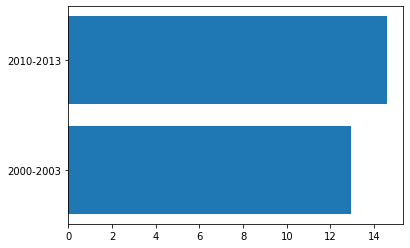

12.966337245213095
14.601851851851851


In [ ]:
# Strikeouts from each era
strikeouts1 = steroid['v_strikeouts']+steroid['h_strikeouts']
strikeout2 = regulated['v_strikeouts']+regulated['h_strikeouts']
#Strikeouts per game
avgstrike1 = strikeouts1.mean()
avgstrikes2 = strikeout2.mean()
averageStrikeouts = [avgstrike1,avgstrikes2]
#Chart
plt.barh(YEARS,averageStrikeouts)
plt.show()
print(avgstrike1)
print(avgstrikes2)

18.164916615194564
17.384465020576133


<BarContainer object of 2 artists>

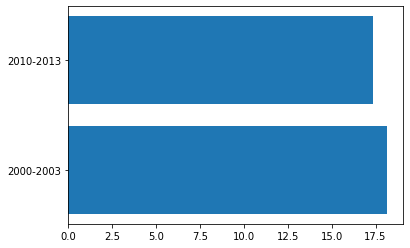

In [ ]:
hitsSteroid = steroid['v_hits'] + steroid['h_hits']
avgHitsRoid = hitsSteroid.mean()
# All hits from 10 years later to compare against the steroid era and the average
hitsRegulated = regulated['v_hits'] + regulated['h_hits']
avgHitsR = hitsRegulated.mean()
# Setup for the bar chart
AVGSHits = [avgHitsRoid,avgHitsR]
YEARSHits = ['2000-2003','2010-2013']
# Bar Chart Viusualization

print(avgHitsRoid)
print(avgHitsR)
plt.barh(YEARSHits,AVGSHits)
